IMPORT LIBRARIES

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOAD DATA

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/Sumit-saha12/Shipment-price-prediction/main/SCMS_Delivery_History_Dataset.csv")

OVERVIEW DATA

In [6]:
print('Total number of rows: ',data.shape[0])
print('Total number of column :',data.shape[1])
data.dtypes

Total number of rows:  10324
Total number of column : 33


ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


DROP COLUMNS

In [7]:
data=data.drop(['Vendor','Item Description','Molecule/Test Type'],axis=1)
data.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64
Line Item Value                 float64
Pack Price                      float64
Unit Price                      float64


DATA CLEAN

In [8]:
data=data[data['First Line Designation']!='No']
data=data[data['Weight (Kilograms)']!='Weight Captured Separately']
data=data[data['Freight Cost (USD)']!='Freight Included in Commodity Cost']
data=data[data['Freight Cost (USD)']!='Invoiced Separately']
data=data[data['Freight Cost (USD)']!='Freight Included in Commodity Cost']
data


,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10305,86802,111-MZ-T30,FPQ-15195,SO-50130,DN-4235,Mozambique,PMO - US,From RDC,N/A - From RDC,Truck,...,60,300000,2316000.00,7.72,0.13,Hetero Unit III Hyderabad IN,Yes,39688,28277.42,2725.93
10306,86803,111-MZ-T30,FPQ-14843,SO-49721,DN-4236,Mozambique,PMO - US,From RDC,N/A - From RDC,Truck,...,30,16006,73467.54,4.59,0.15,"Hetero, Jadcherla, unit 5, IN",Yes,1504,1653.9,75.52
10310,86808,114-UG-T30,FPQ-15294,SO-50070,DN-4259,Uganda,PMO - US,From RDC,N/A - From RDC,Truck,...,60,18000,64800.00,3.60,0.06,Mylan (formerly Matrix) Nashik,Yes,2253,3785.72,76.27
10315,86814,151-NG-T30,FPQ-14989,SO-51424,DN-4276,Nigeria,PMO - US,From RDC,N/A - From RDC,Air Charter,...,120,70000,1304800.00,18.64,0.16,ABBVIE Ludwigshafen Germany,Yes,15198,26180,1341.33


In [9]:
data['Weight (Kilograms)'] = pd.to_numeric(data['Weight (Kilograms)'])
data['Freight Cost (USD)'] = pd.to_numeric(data['Freight Cost (USD)'])

data.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64
Line Item Value                 float64
Pack Price                      float64
Unit Price                      float64


ANALYSIS OF DATA

In [10]:
order=data['PO / SO #'].nunique()
total_order=data['PO / SO #'].count()
duplicate_orders=total_order-order
total_unique_projects=data['Project Code'].nunique()
total_Freight_Cost=data['Freight Cost (USD)'].sum()
total_weight=data['Weight (Kilograms)'].sum()
avg_freight_cost_uniqueorder=total_Freight_Cost/order
avg_weight_uniqueorder=total_weight/order
unique_country=data['Country'].nunique()
unique_shipment_mode=data['Shipment Mode'].nunique()
country_summary=data.groupby(['Shipment Mode','Country','Freight Cost (USD)','Weight (Kilograms)']).sum().reset_index()
country_summary=country_summary[['Shipment Mode','Country','Freight Cost (USD)','Weight (Kilograms)']]
country_summary=data.groupby(['Shipment Mode','Country']).agg({'PO / SO #':'count','Freight Cost (USD)':'sum','Weight (Kilograms)':'sum'}).reset_index()
country_summary['freight_cost_by_order']=country_summary['Freight Cost (USD)']/country_summary['PO / SO #']
top_ten_country_by_freight_cost=data.groupby(['Country'])['Freight Cost (USD)'].sum().nlargest(10).reset_index()
mf_summary=data.groupby(['Manufacturing Site']).agg({'PO / SO #':'count','Freight Cost (USD)':'sum'}).reset_index()



DATA VISUALIZATION

Freight_cost_by_order_by_country_order

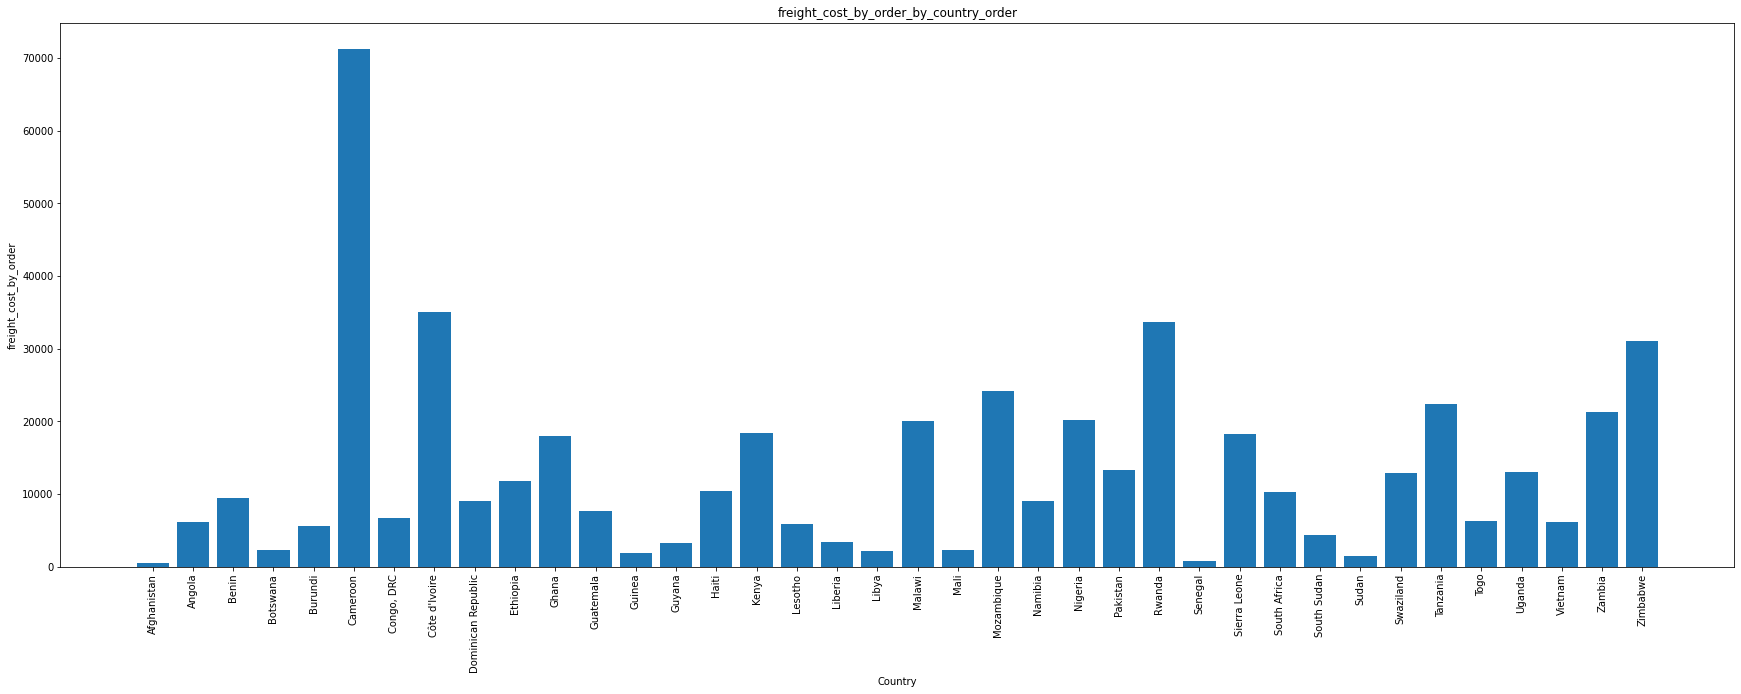

In [11]:

plt.figure(figsize=(30,10))
plt.rc({'font.size':30})
plt.bar(country_summary.Country,country_summary.freight_cost_by_order)
plt.xticks(rotation='vertical')
plt.ylabel('freight_cost_by_order')
plt.xlabel('Country')
plt.title('freight_cost_by_order_by_country_order')
plt.show()

Freight_cost_by_order_by_shipment_mode

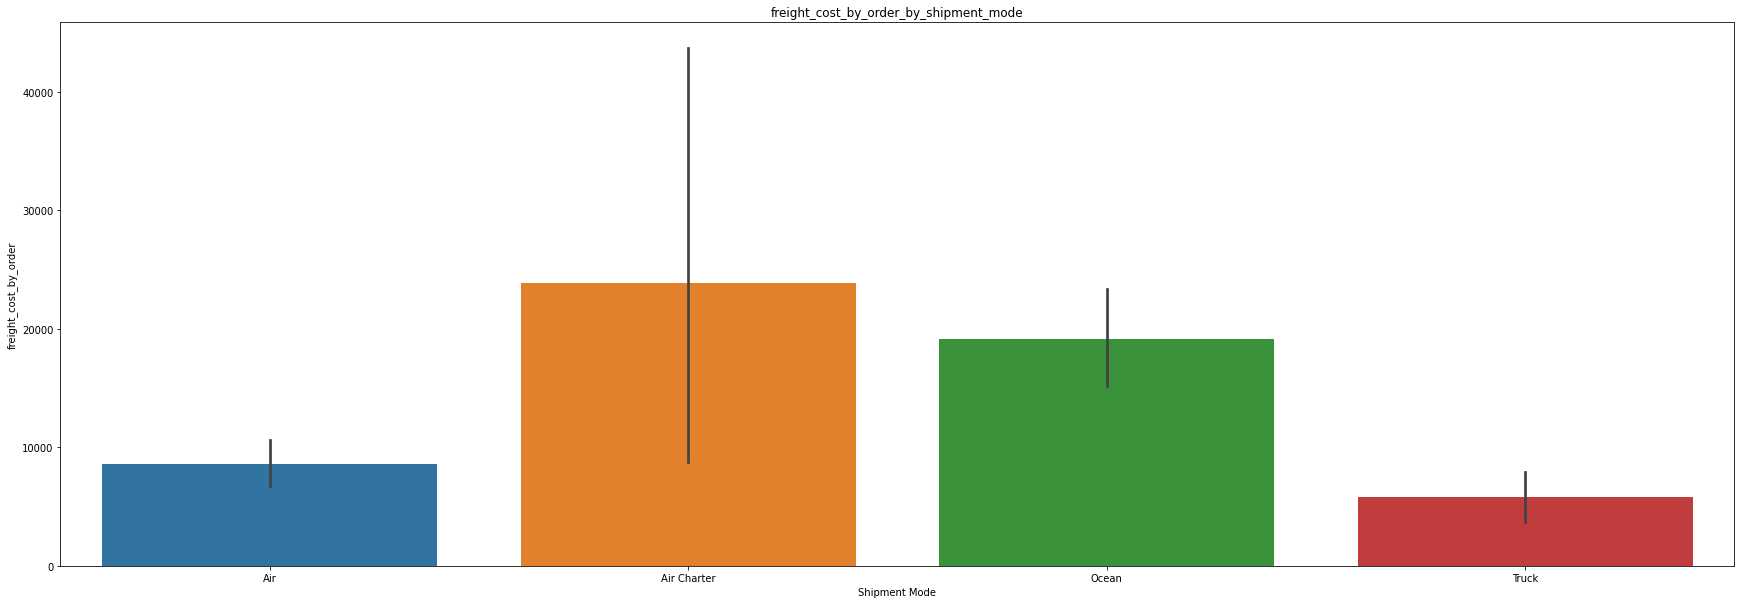

In [12]:
plt.figure(figsize=(30,10))
plt.rc({'font.size':30})
# plt.bar(country_summary.freight_cost_by_order,country_summary.Shipment Mode)
sns.barplot(x='Shipment Mode',y='freight_cost_by_order',data=country_summary)
plt.ylabel('freight_cost_by_order')
plt.xlabel('Shipment Mode')
plt.title('freight_cost_by_order_by_shipment_mode')
plt.show()

Order_by_country

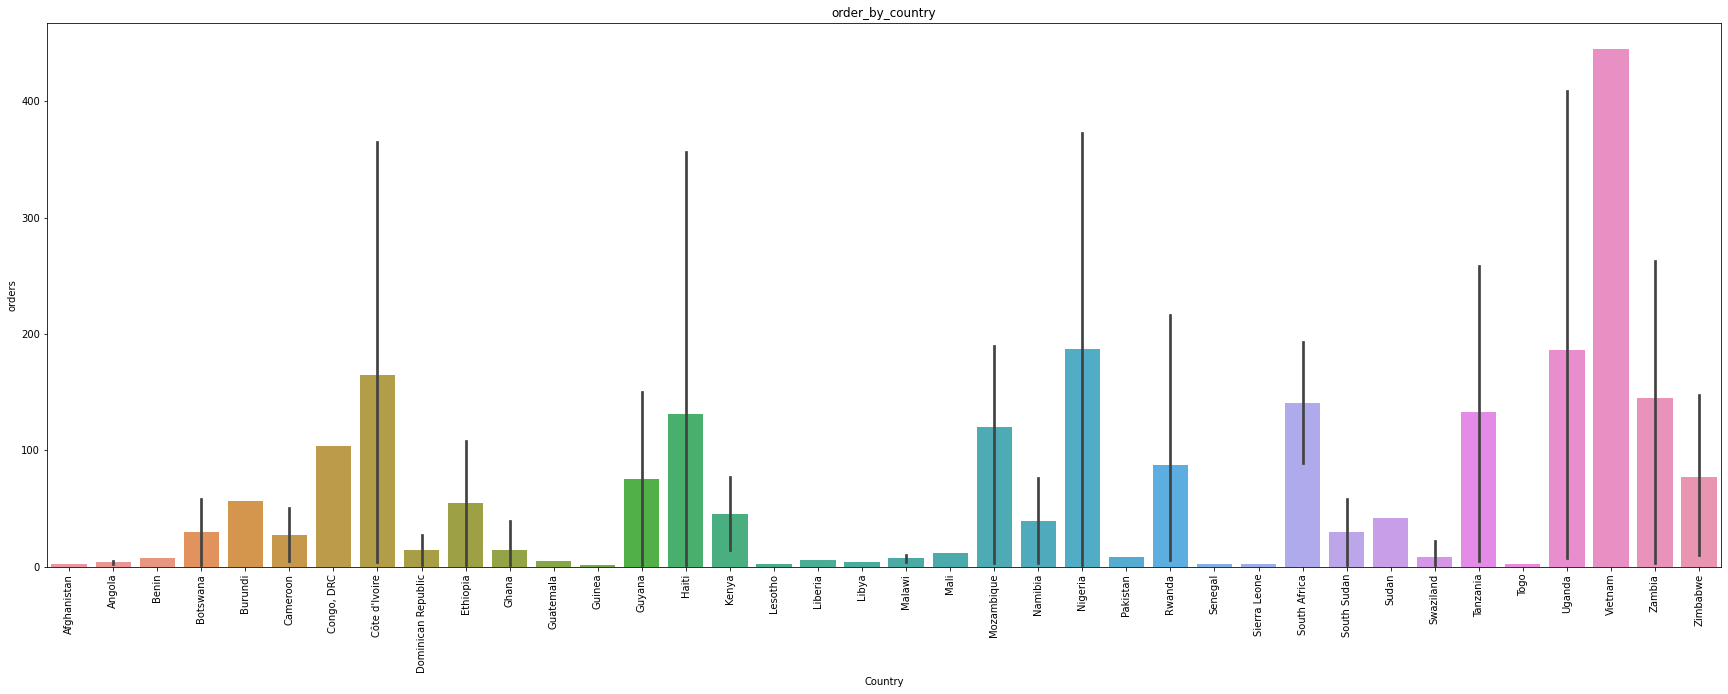

In [13]:
plt.figure(figsize=(30,10))
plt.rc({'font.size':30})
sns.barplot(x='Country',y='PO / SO #',data=country_summary)
plt.xticks(rotation='vertical')
plt.ylabel('orders')
plt.xlabel('Country')
plt.title('order_by_country')
plt.show()

Top_ten_country_by_freight_cost

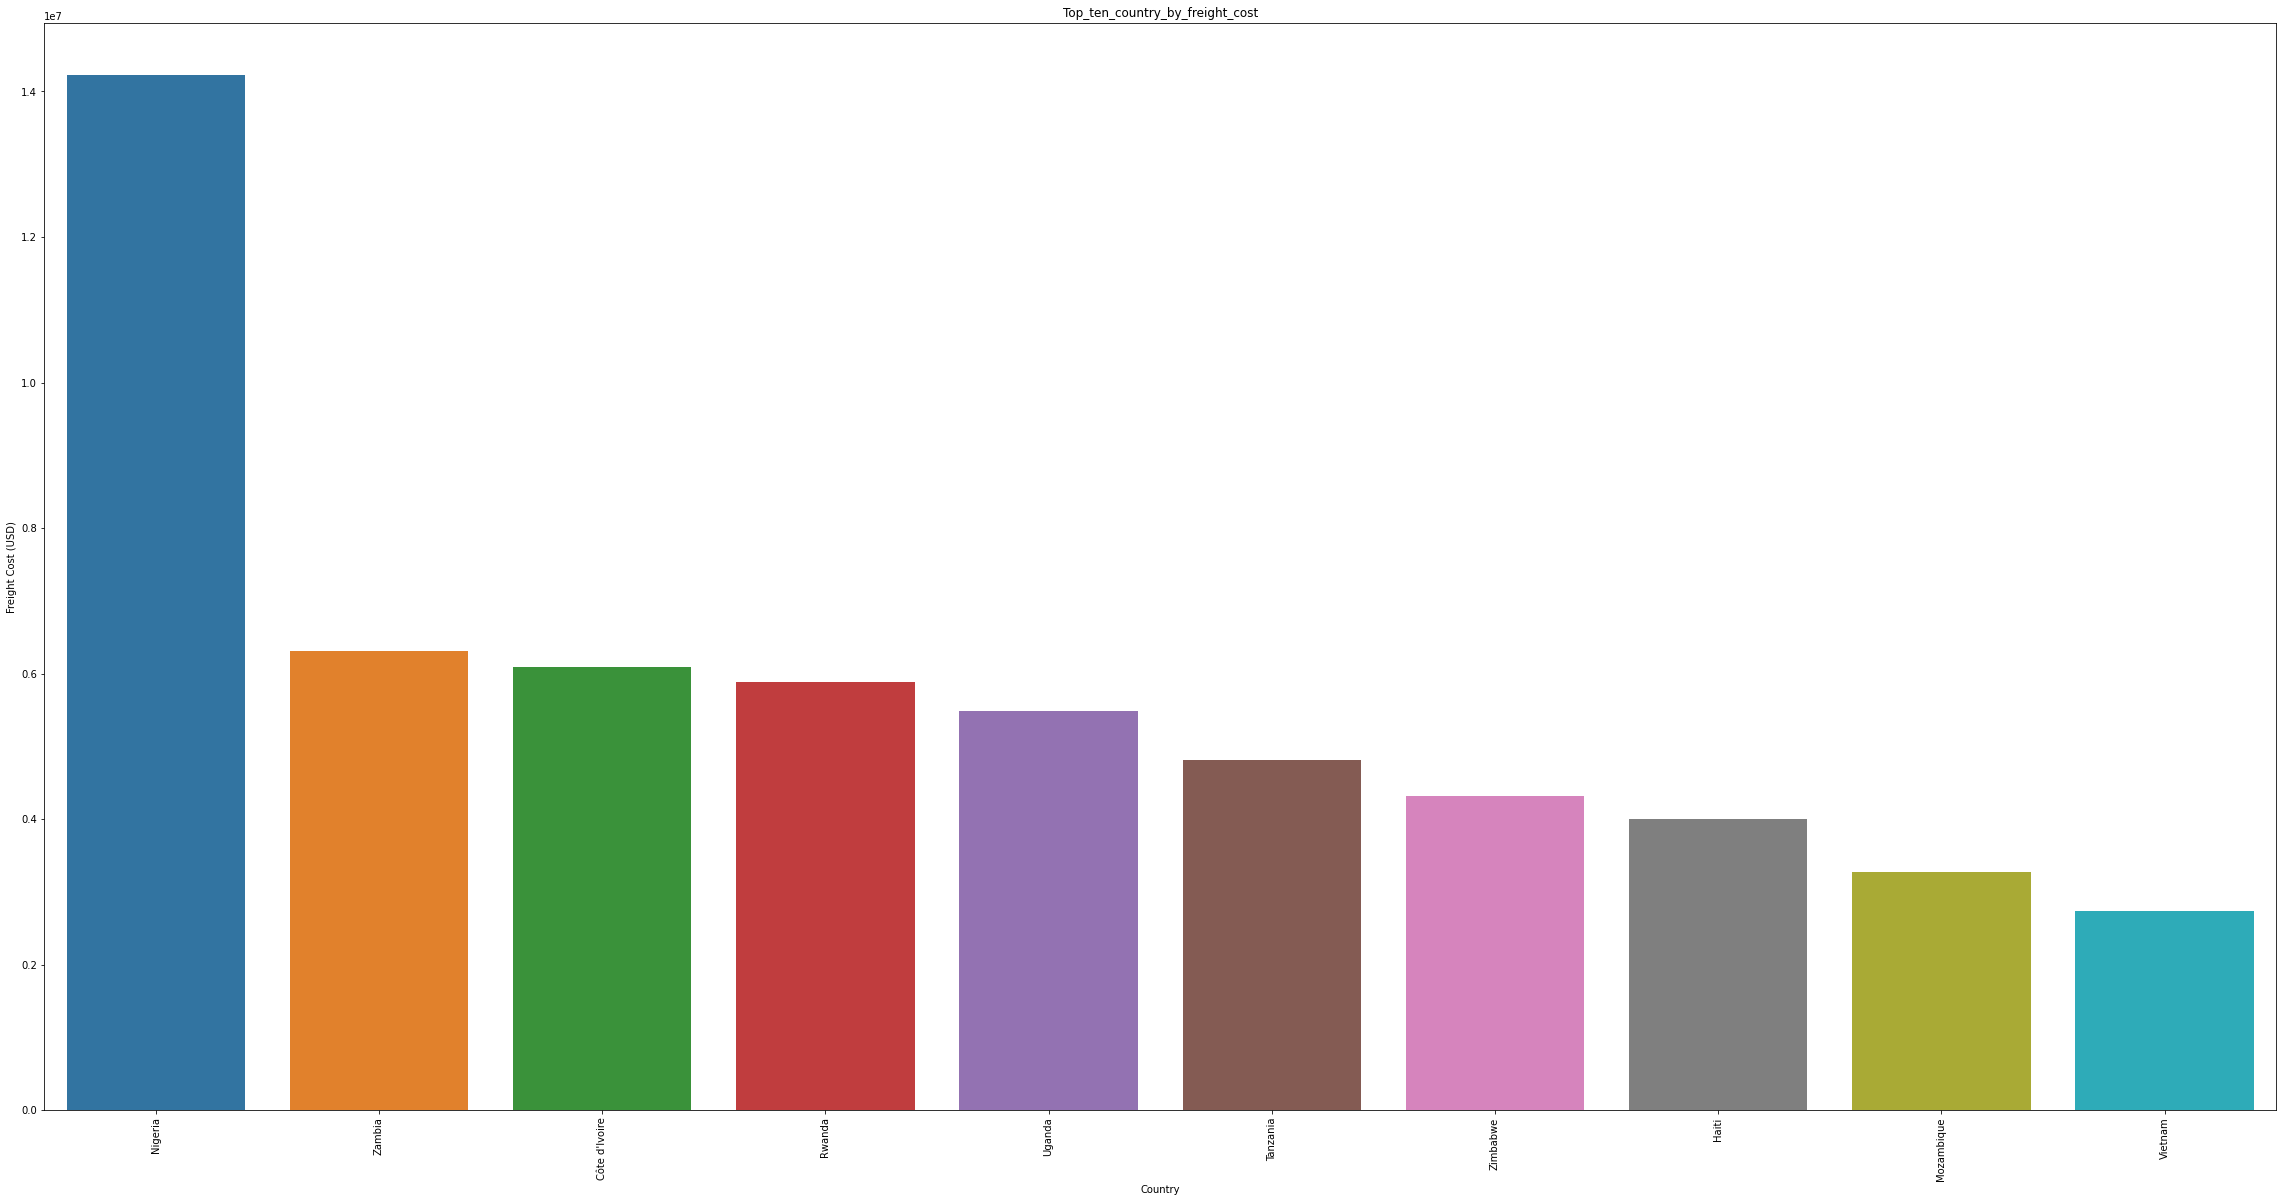

In [14]:
plt.figure(figsize=(40,20))
plt.rc({'font.size':30})
sns.barplot(x='Country',y='Freight Cost (USD)',data=top_ten_country_by_freight_cost)
plt.xticks(rotation='vertical')
plt.ylabel('Freight Cost (USD)')
plt.xlabel('Country')
plt.title('Top_ten_country_by_freight_cost')
plt.show()

Manufacturing Site by freight cost

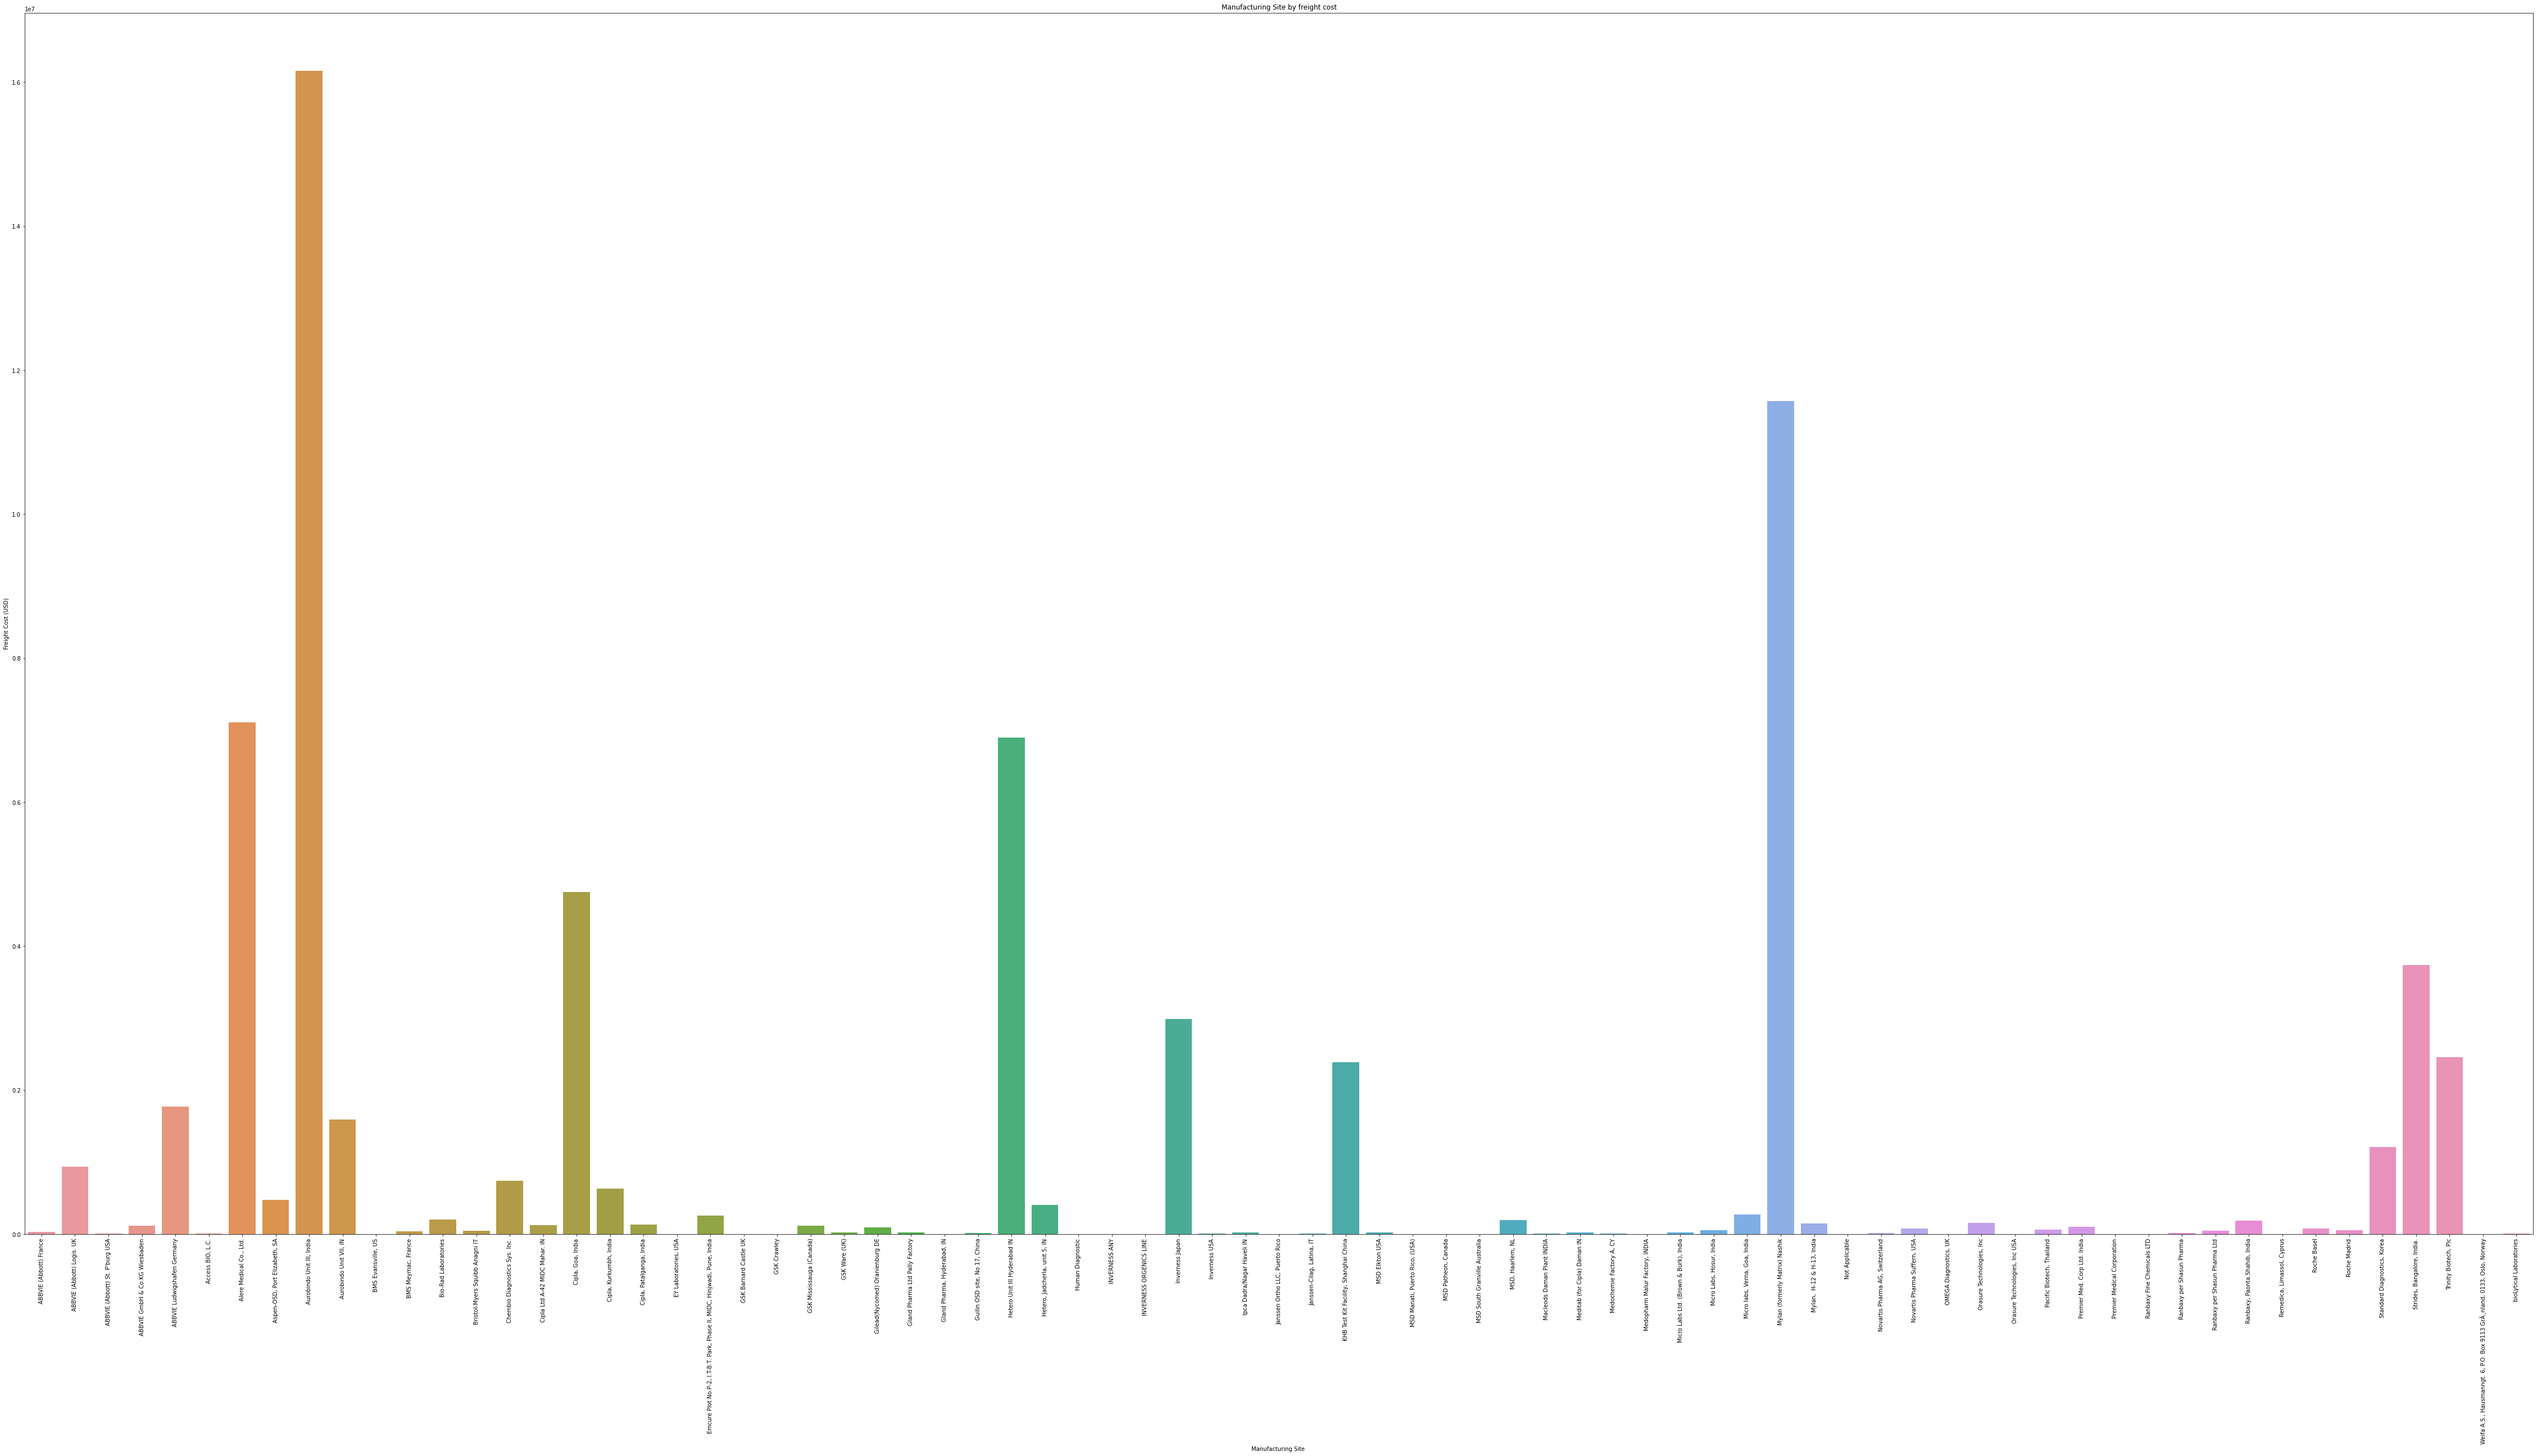

In [15]:
plt.figure(figsize=(80,40))
plt.rc({'font.size':120})
sns.barplot(x='Manufacturing Site',y='Freight Cost (USD)',data=mf_summary)
plt.xticks(rotation='vertical')
plt.ylabel('Freight Cost (USD)')
plt.xlabel('Manufacturing Site ')
plt.title('Manufacturing Site by freight cost')
plt.show()

Manufacturing Site by order

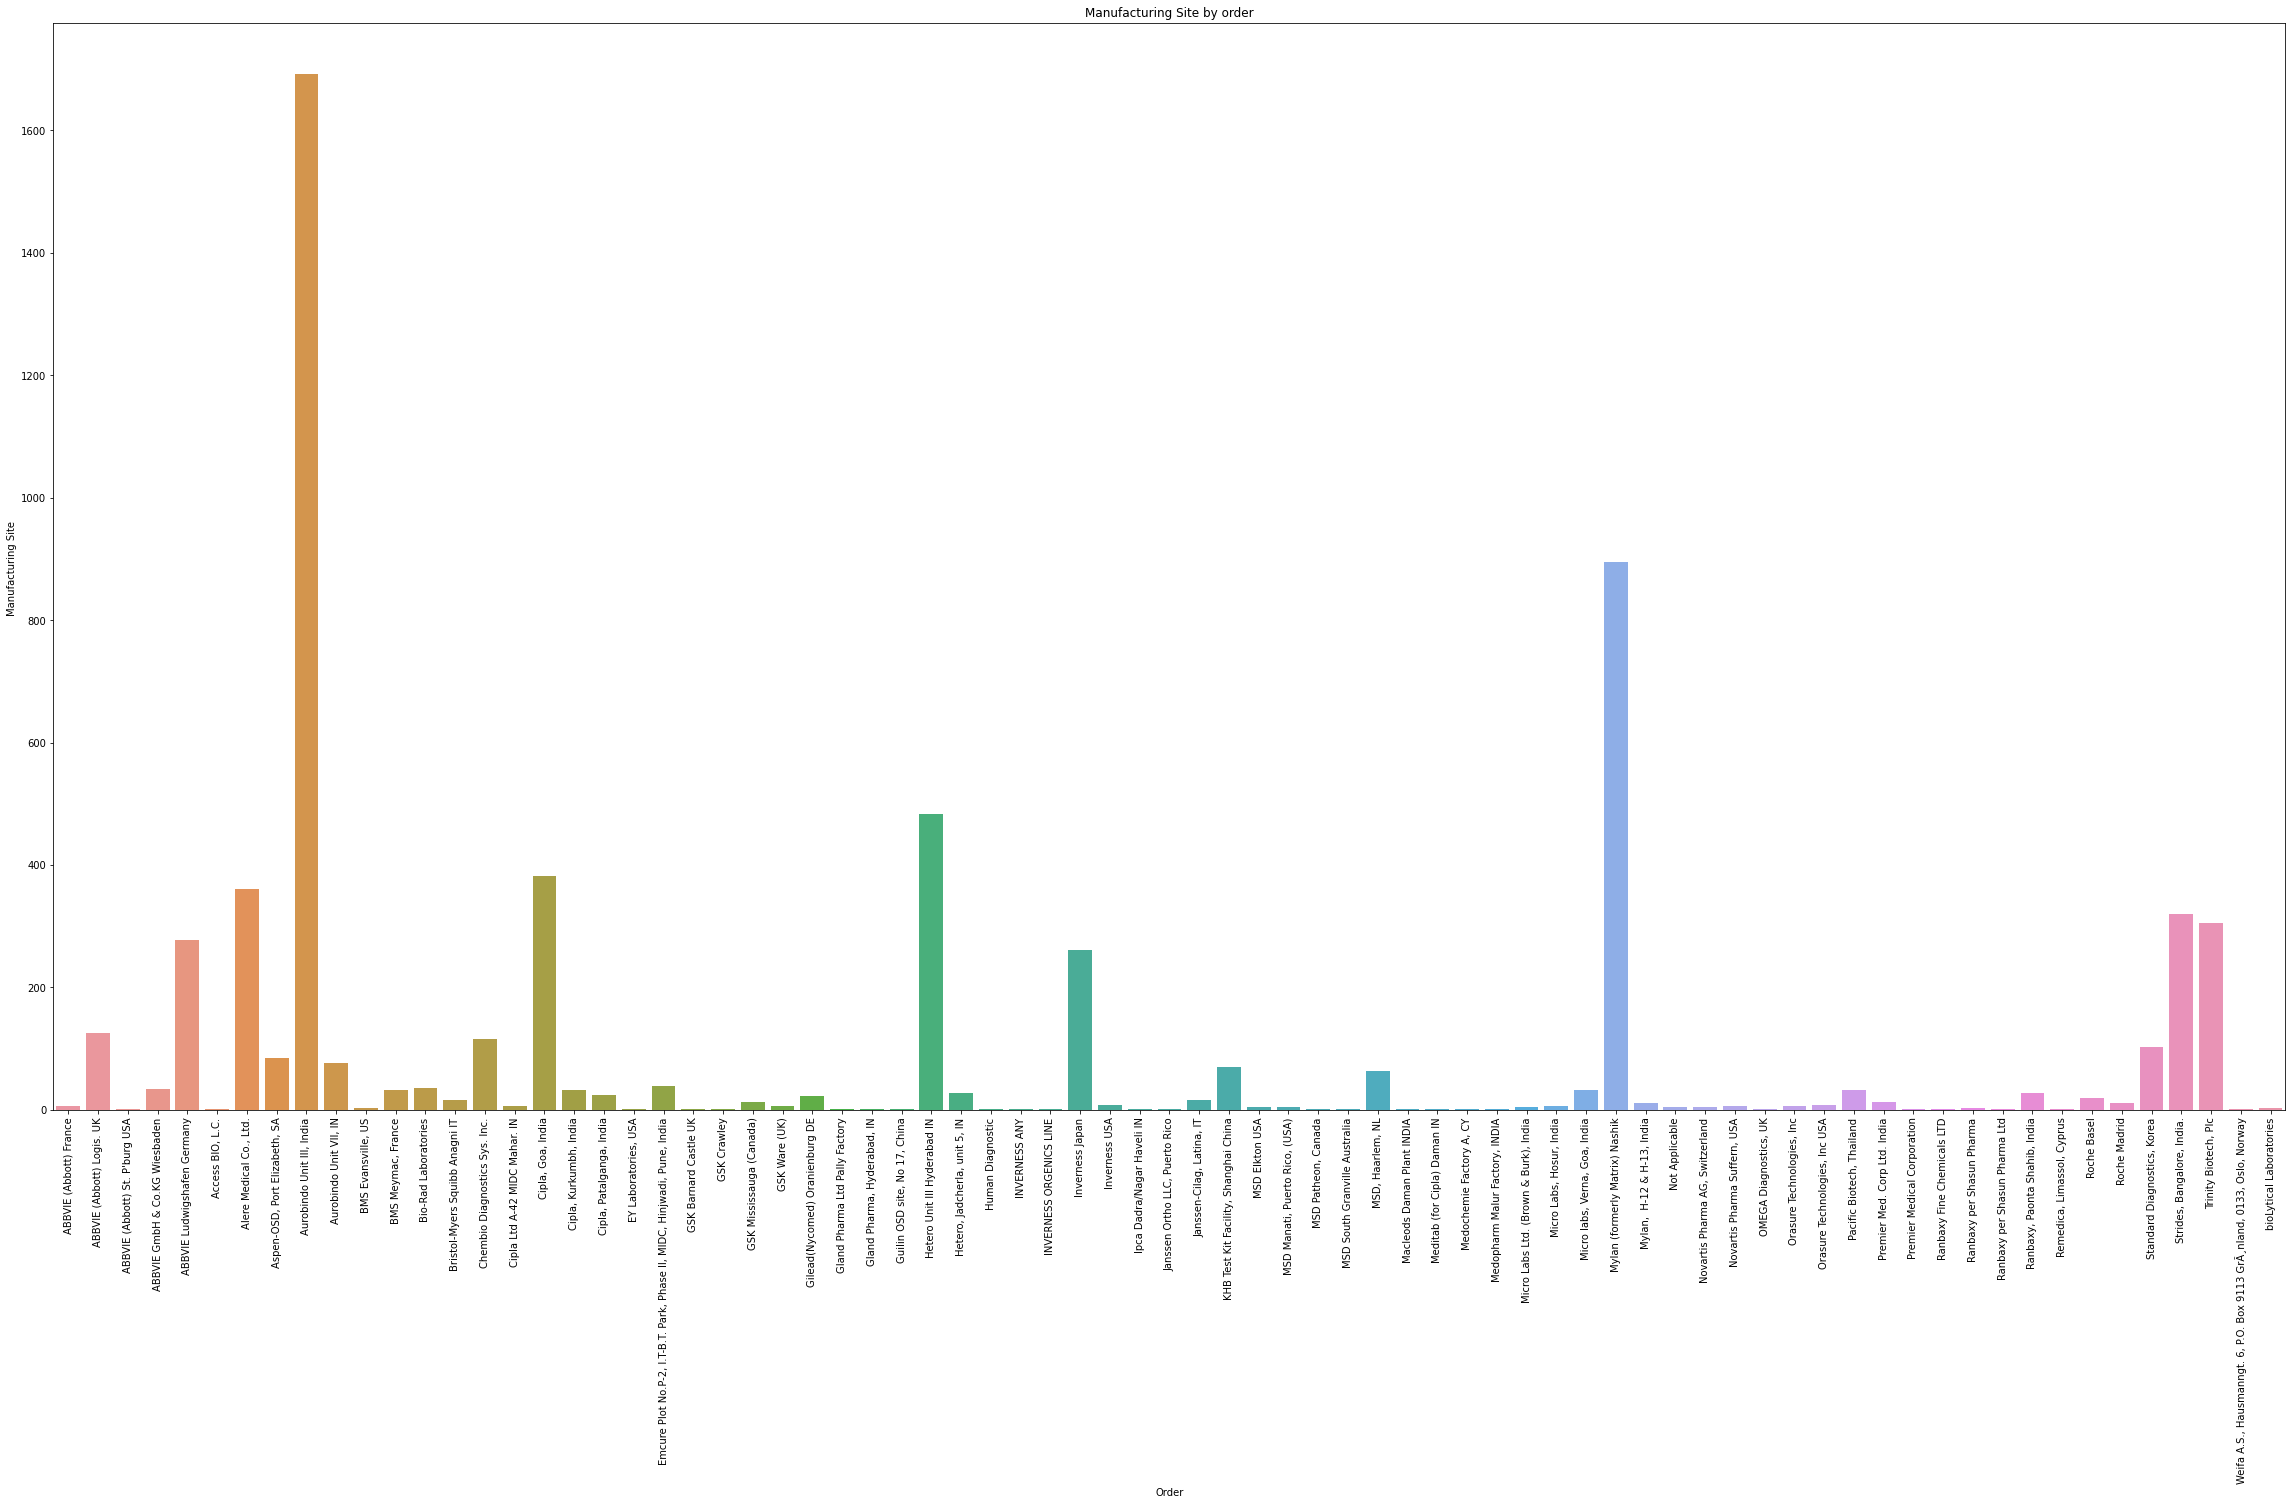

In [16]:
plt.figure(figsize=(40,20))
plt.rc({'font.size':30})
sns.barplot(x='Manufacturing Site',y='PO / SO #',data=mf_summary)
plt.xticks(rotation='vertical')
plt.ylabel('Manufacturing Site ')
plt.xlabel('Order')
plt.title('Manufacturing Site by order')
plt.show()